<a href="https://colab.research.google.com/github/JagratiTalreja01/Super-Resolution-SRCNN-/blob/main/Add_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, Activation

In [2]:
img_size = (32,32,1)
input_img = Input(shape=(img_size))
C1 = Conv2D(6,(3,3),padding='SAME',name='CONV1')(input_img)
#FIRST BRANCH
C2 = Conv2D(6,(3,3),padding='SAME',name='CONV2')(C1)
C3 = Conv2D(6,(5,5),padding='SAME',name='CONV3')(C1)
C4 = Conv2D(6,(7,7),padding='SAME',name='CONV4')(C1)
Add1= keras.layers.Add()([C2, C3,C4])


#SECOND BRANCH
C5 = Conv2D(6,(3,3),padding='SAME',name='CONV5')(Add1)
C6 = Conv2D(6,(5,5),padding='SAME',name='CONV6')(Add1)
C7 = Conv2D(6,(7,7),padding='SAME',name='CONV7')(Add1)
Add2= keras.layers.Add()([C5, C6,C7])

#THIRD BRANCH
C8 = Conv2D(6,(3,3),padding='SAME',name='CONV8')(Add2)
C9 = Conv2D(6,(5,5),padding='SAME',name='CONV9')(Add2)
C10 = Conv2D(6,(7,7),padding='SAME',name='CONV10')(Add2)
Add3= keras.layers.Add()([C8, C9,C10])

model = Model(inputs=input_img, outputs=Add3)

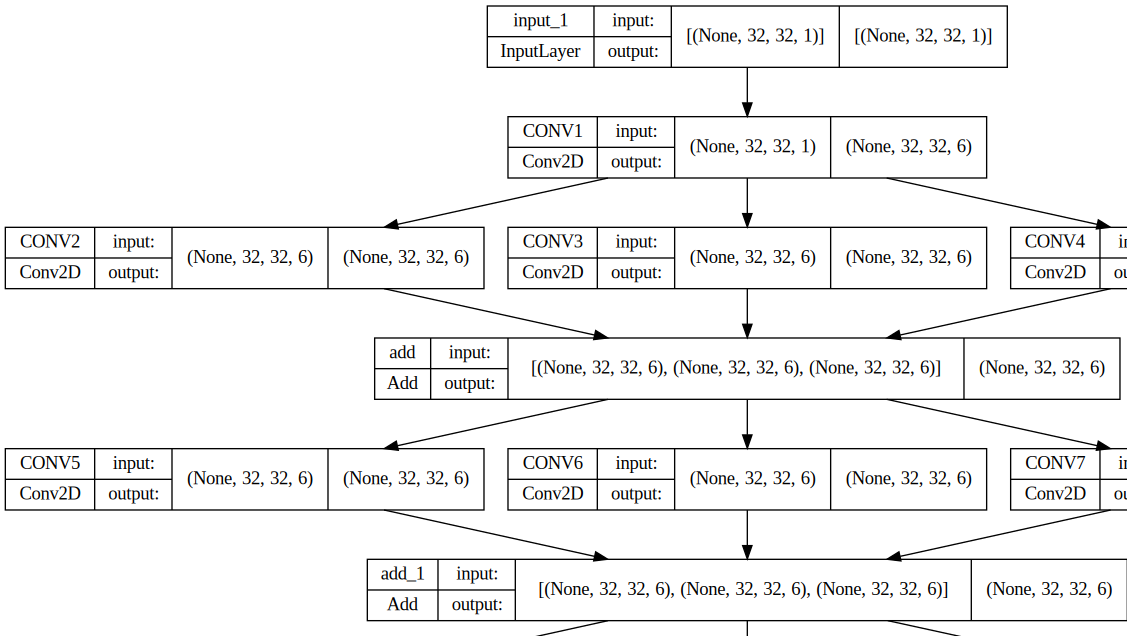

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))